# Intro to Visualisation

In [112]:
# Let us create the humble dataset
areas <- c("North", "East", "West", "South", "Central")
sales <- c(5, 25, 15, 20, 10)
profit <- c(2, 8, 6, 5, 3)

In [113]:
# For maps
lat <- c(0, 1, -1, 0, 0)
lon <- c(1, 0, 0, -1, 0)

In [114]:
humble <- data.frame(areas, sales, profit, lat, lon)

In [115]:
humble$areas <- factor(humble$areas, levels = c("North", "East", "West", "South", "Central"))

In [116]:
str(humble)

'data.frame':	5 obs. of  5 variables:
 $ areas : Factor w/ 5 levels "North","East",..: 1 2 3 4 5
 $ sales : num  5 25 15 20 10
 $ profit: num  2 8 6 5 3
 $ lat   : num  0 1 -1 0 0
 $ lon   : num  1 0 0 -1 0


## ggplot2 library

Created by Hadley Wickham. Based on the book - "The Grammar of Graphic" by Leland Wilkinson

Grammar: “the fundamental principles or rules of an art or science”

"…rules for constructing graphs mathematically and then representing them as graphics aesthetically."

- **data**: The data that you want to visualise.
- **aes**: A set of aesthetic mappings describing how variables in the data are mapped to aesthetic attributes that you can perceive.
geom: Geometric objects represent what you actually see on the plot: points, lines, polygons, etc.
- **stat**: Statistical transformations summarise data in many useful ways. For example, binning and counting observations to create a histogram, or summarising a 2d relationship with a linear model.
- **scales**: The scales map values in the data space to values in an aesthetic space, whether it be colour, or size, or shape. Scales draw a legend or axes, which provide an inverse mapping to make it possible to read the original data values from the graph.
- **coord**: A coordinate system describes how data coordinates are mapped to the plane of the graphic. It also provides axes and gridlines to make it possible to read the graph. We normally use a Cartesian coordinate system, but a number of others are available, including polar coordinates and map projections.
- **facet**: A faceting specification describes how to break up the data into subsets and how to display those subsets as small multiples. This is also known as conditioning or latticing/trellising.


### Terminology - ggplot2
- data
- aes e.g. x, y, fill, color
- geom e.g. point, bar, line
- stat e.g. identity, bin, count
- scale e.g. log, reverse, color
- coord e.g. cartesian, polar, map
- facet e.g. wrap, grid

### Documentation

[http://docs.ggplot2.org](http://docs.ggplot2.org)

### Basic Syntax
Main arguments
- data set, usually a data.frame
- aesthetic mappings provided by aes function

**General ggplot syntax**

`ggplot(data) + aes(…) + geom_x() + … + stat_x + …`

**Layer specifications**

geom_*(mapping, data, …, geom, position)
stat_*(mapping, data, …, stat, position)
Additional components: scales, coordinates, facet

In [117]:
library(ggplot2)

In [118]:
# ggplot(data = humble) + aes(x = areas, weight = sales, fill = profit) + geom_bar()

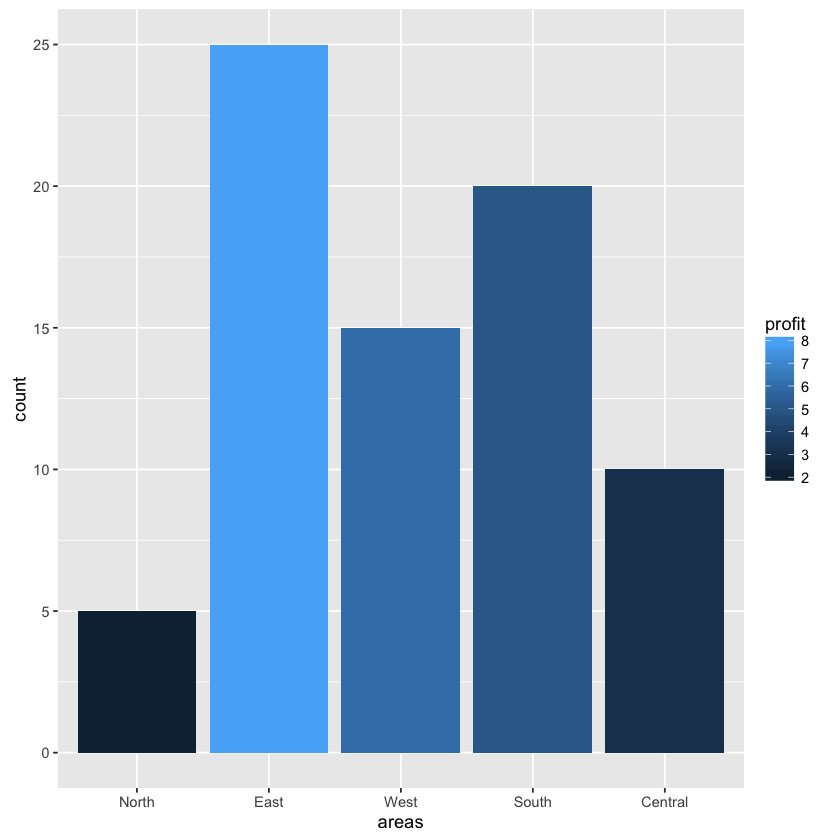

In [119]:
ggplot(humble) + aes(areas, weight = sales, fill = profit) + geom_bar()

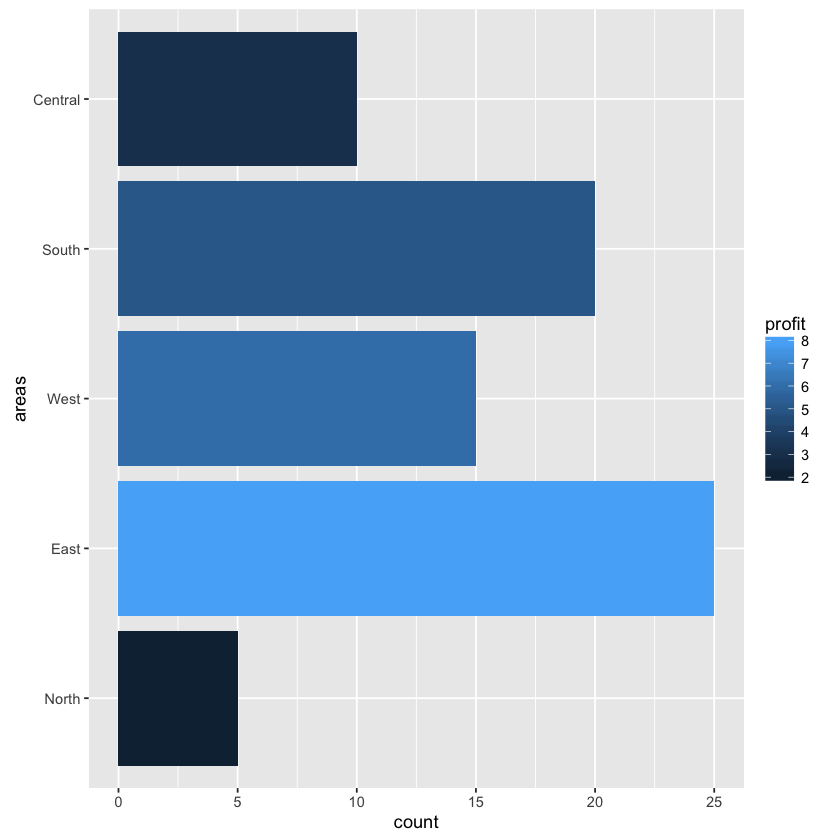

In [120]:
ggplot(humble) + aes(areas, weight = sales, fill = profit) + geom_bar() + coord_flip()

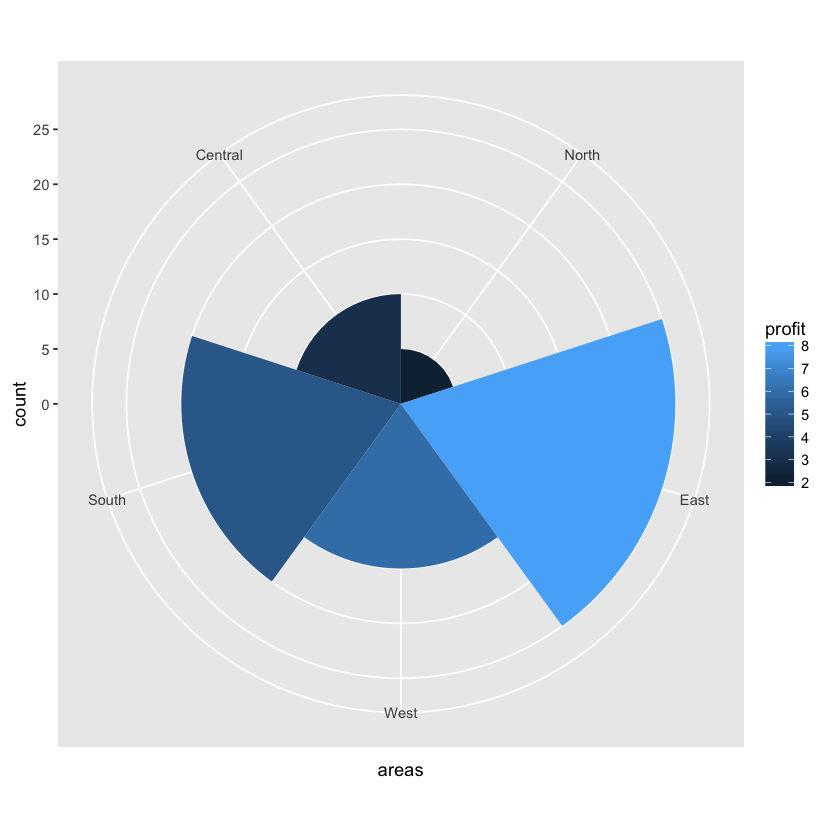

In [121]:
ggplot(humble) + aes(areas, weight = sales, fill = profit) + geom_bar(width = 1) + coord_polar()

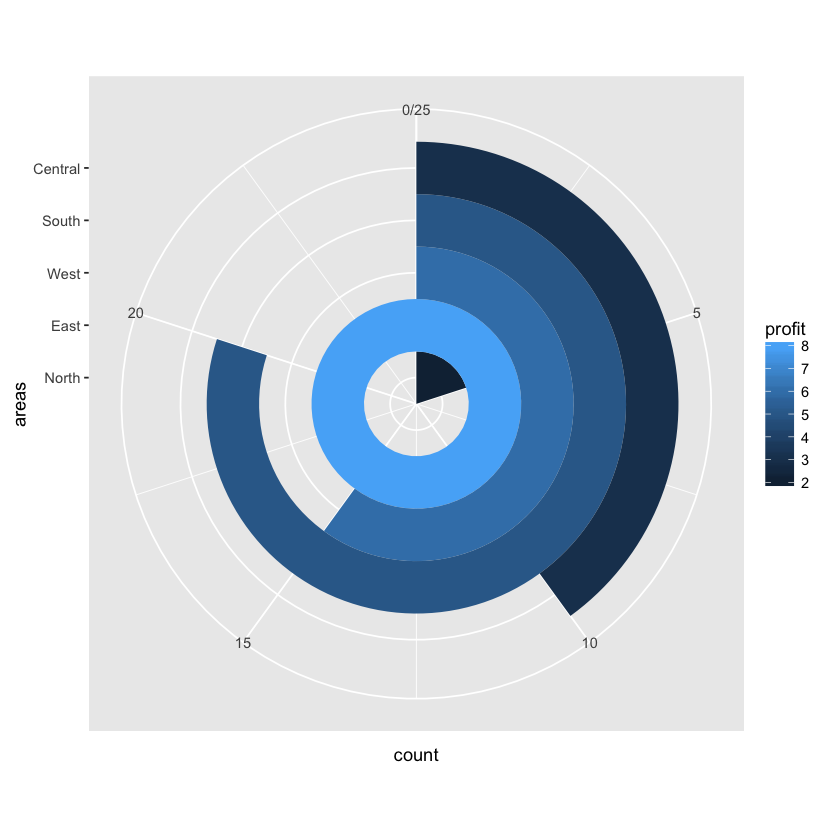

In [122]:
ggplot(humble) + aes(areas, weight = sales, fill = profit) + geom_bar(width = 1) + coord_polar(theta = "y")

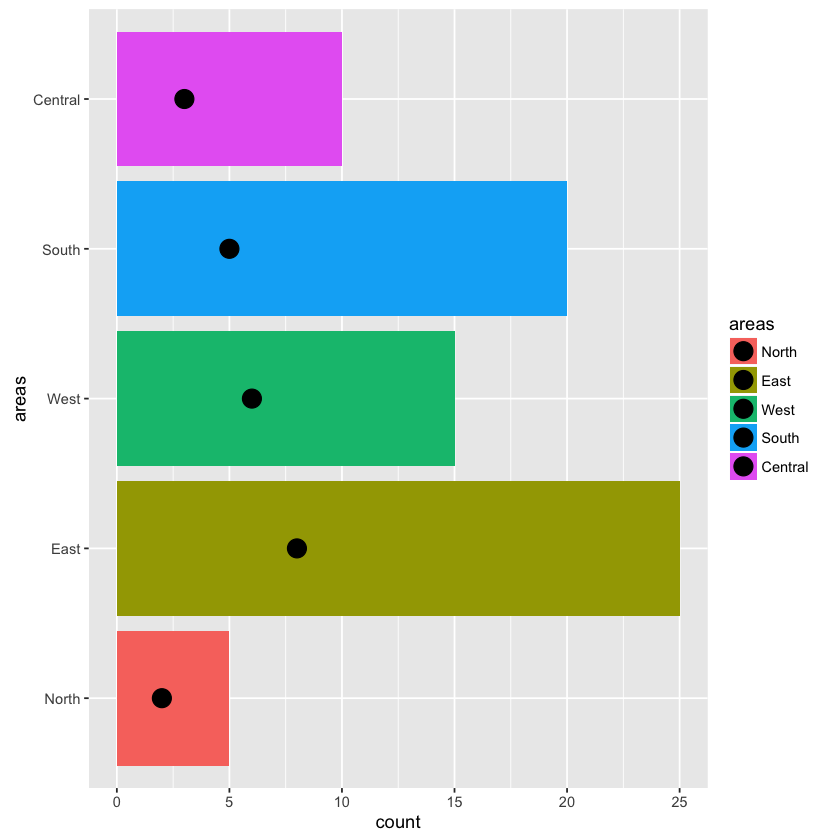

In [123]:
ggplot(humble) + aes(areas, weight = sales, fill = areas) + geom_bar() + 
        geom_point(aes(areas, profit), size = 5) + coord_flip()

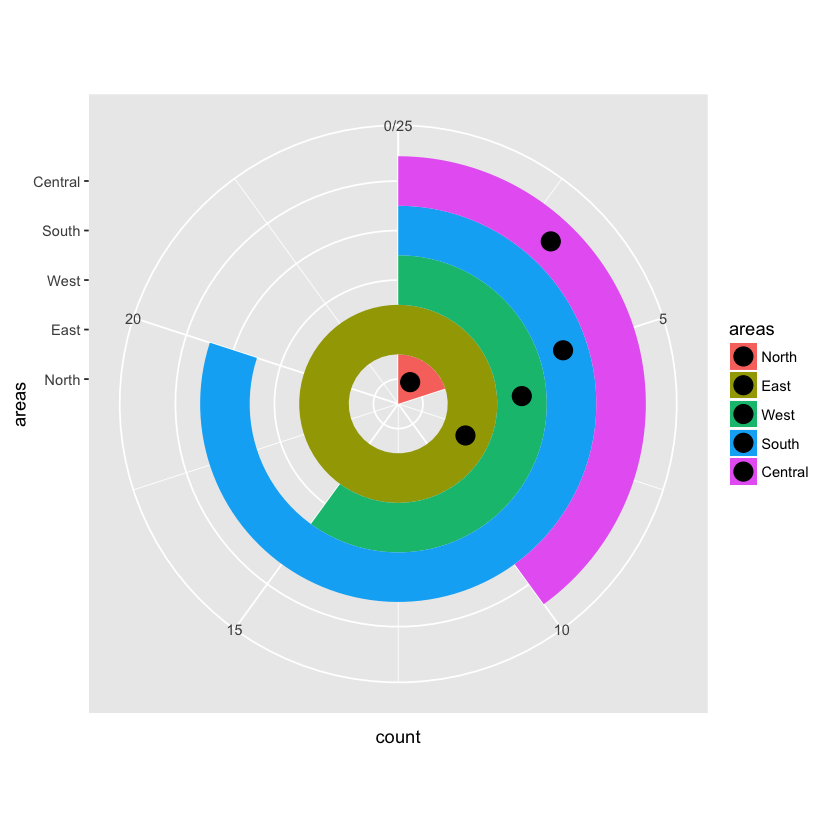

In [124]:
ggplot(humble) + aes(areas, weight = sales, fill = areas) + geom_bar(width = 1) + 
        geom_point(aes(areas, profit), size = 5) + coord_polar(theta = "y")

In [125]:
library(dplyr)
library(tidyr)

In [126]:
humbleTall <- humble %>%
              gather("metric", "value", 2:3)

In [127]:
humbleTall

,areas,lat,lon,metric,value
1,North,0,1,sales,5
2,East,1,0,sales,25
3,West,-1,0,sales,15
4,South,0,-1,sales,20
5,Central,0,0,sales,10
6,North,0,1,profit,2
7,East,1,0,profit,8
8,West,-1,0,profit,6
9,South,0,-1,profit,5
10,Central,0,0,profit,3


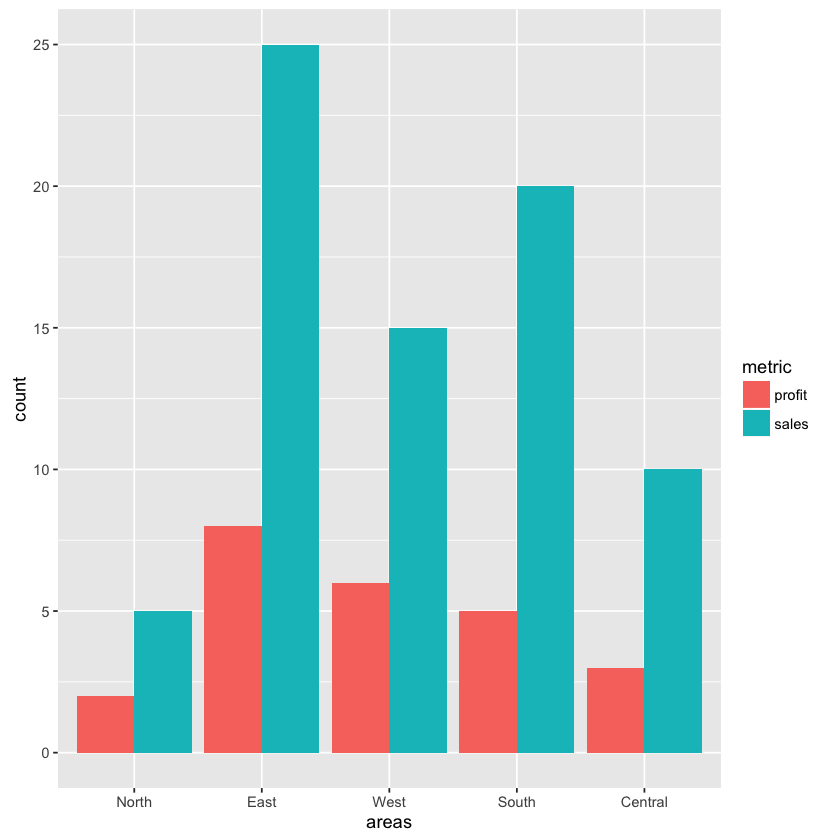

In [128]:
ggplot(humbleTall) + aes(areas, weight = value, fill = metric) + geom_bar(position = 'dodge')

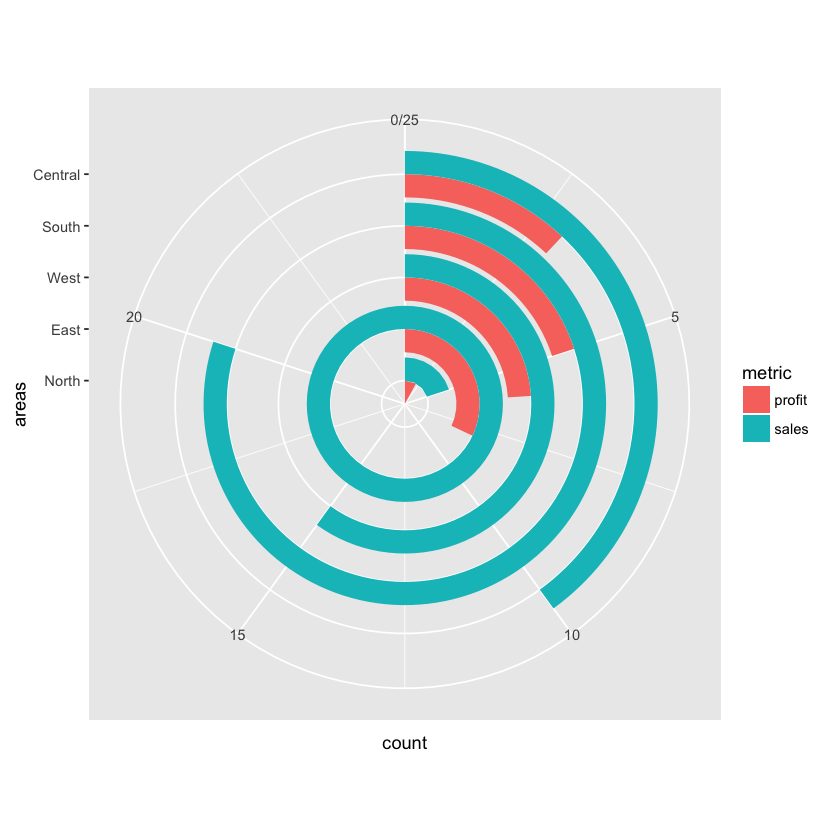

In [129]:
ggplot(humbleTall) + aes(areas, weight = value, fill = metric) + geom_bar(position = 'dodge') + 
   coord_polar(theta = "y")

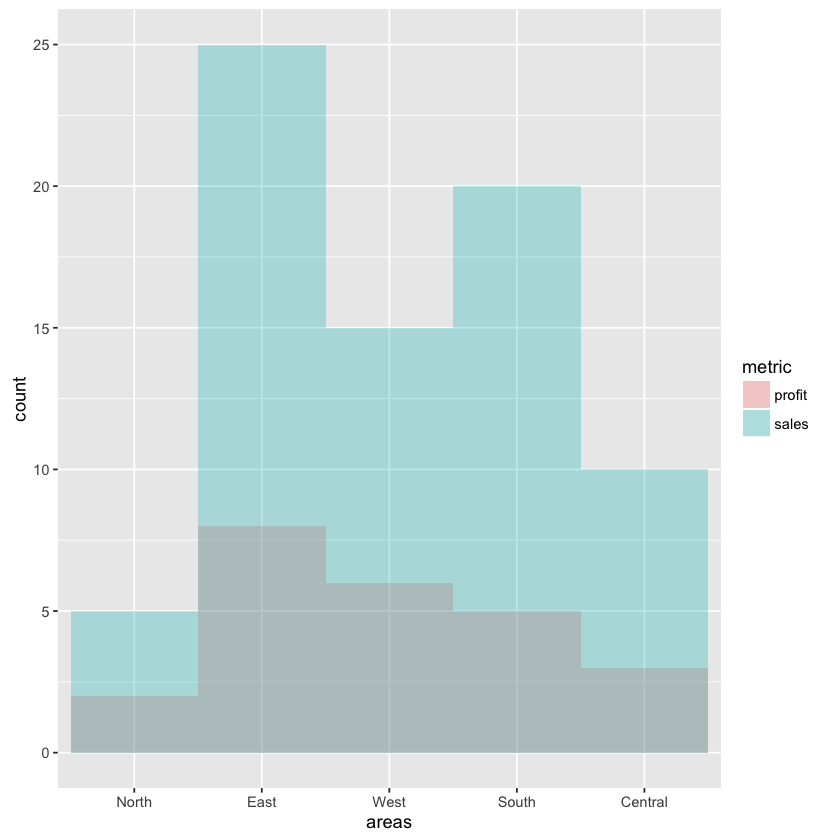

In [130]:
ggplot(humbleTall) + aes(areas, weight = value, fill = metric) + 
   geom_bar(alpha = 0.3, width = 1, position = "identity")

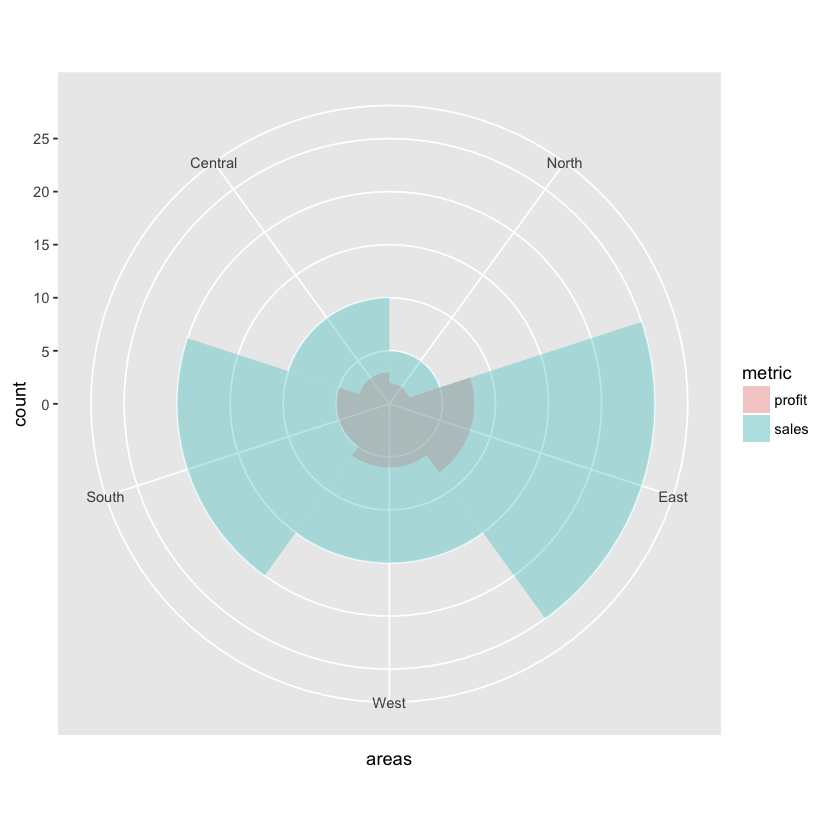

In [131]:
ggplot(humbleTall) + aes(areas, weight = value, fill = metric) + 
   geom_bar(alpha = 0.3, width = 1, position = "identity") + coord_polar()

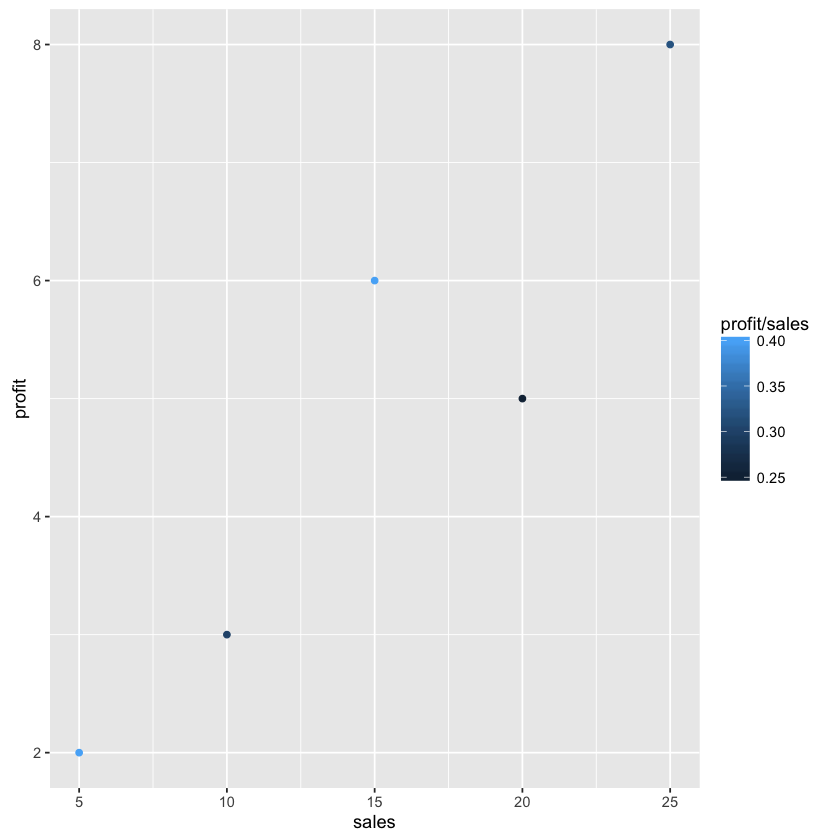

In [132]:
ggplot(humble) + aes(sales, profit, color = profit/sales) + geom_point()

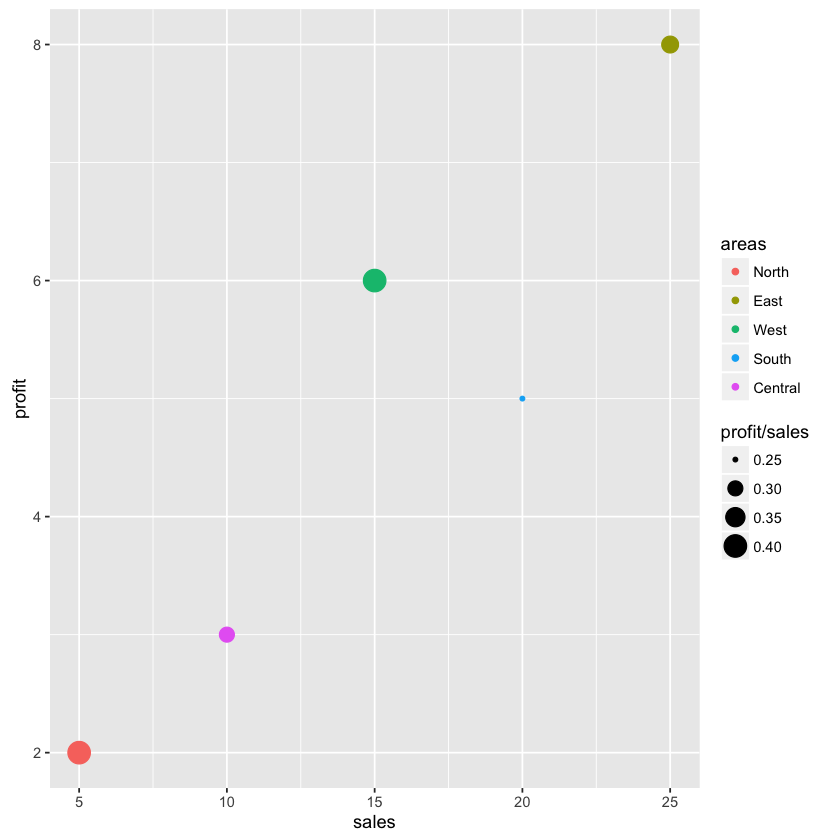

In [133]:
ggplot(humble) + aes(sales, profit, size = profit/sales, color = areas) + geom_point()

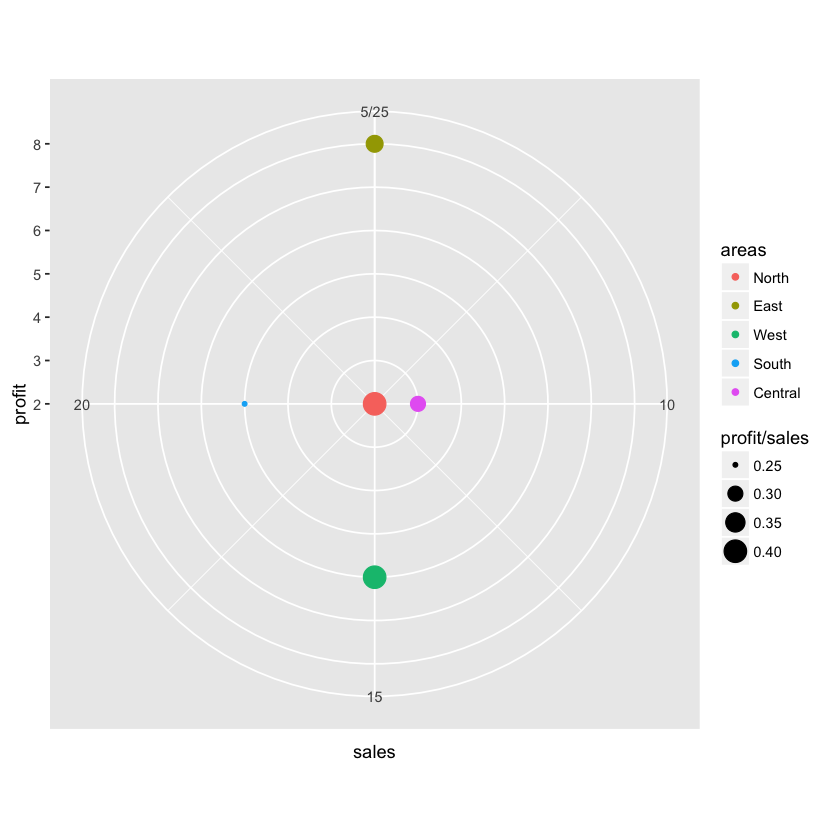

In [134]:
ggplot(humble) + aes(sales, profit, size = profit/sales, color = areas) + geom_point() + coord_polar()

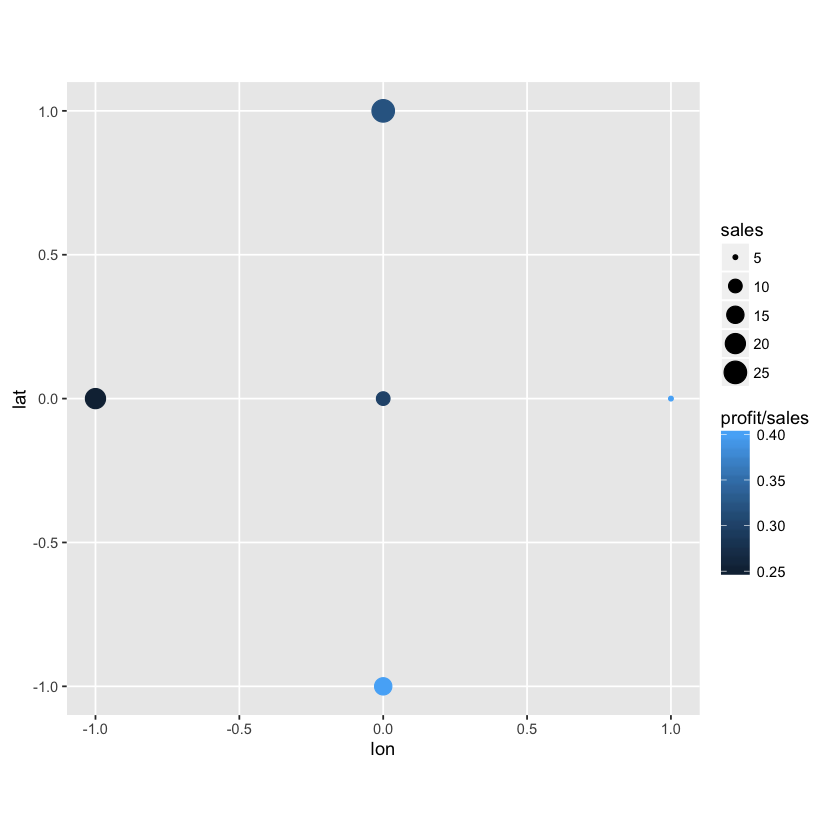

In [135]:
ggplot(humble) + aes(lon, lat, size = sales, color = profit/sales) + geom_point() + coord_map()